# Project 2: Churn


## EDA: Exploratory Data Analysis of Churn

Import libraries and read CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn = pd.read_csv('churn.csv')

Check dimensions -  examples (Rows, x-axis) and features (columns, y-axis)

In [2]:
churn.shape # 7043 Rows / 21 Columns

(7043, 21)

Checking top 10 to view example of dataframe

In [3]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data Cleaning Procedure

For ease, renaming columns to lowercase

In [4]:
churn = churn.rename(columns=str.lower)
churn.columns #check

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

##### Label to numeric
Check which labels are true to yes to verify it matches when creating int labels

In [5]:
(churn.churn =='Yes')

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

Transform type of Churn Labels (n 0 , y 1)

In [6]:
churn.churn = (churn.churn=='Yes').astype('int')

churn['churn'].head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: churn, dtype: int32

Drop features that are not informative. Dropped CustomerID as it has no value to our measurements. 
Cleaning index to start at 1

In [7]:
churn = churn.drop(['customerid'], axis=1)
churn.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [8]:
churn.index += 1 
churn.index #check range

RangeIndex(start=1, stop=7044, step=1)

Check for Missing Values. Note, "No phone service" and "No internet service" values, missing values in totalcharges

In [9]:
churn.isna().sum() #use sum function to add up na by column during check, can also use mean for percentage

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

#### Converting the string empty space to NaN

In [10]:
churn['totalcharges'] = pd.to_numeric(churn['totalcharges'], errors='coerce')

churn.isna().sum()


gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

#### Will interpolate to estimate the missing values based on the rest of the values in totalcharges. While small amount of NaN, Dataset is not large enough to just drop rows. Using this instead of median, which is also an estimation

In [11]:
churn['totalcharges'] = churn['totalcharges'].interpolate()

churn.isna().sum() #succes!!

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Will treat the values of "No Phone Service" and "No Internet Service" as 'No' for uniformity

In [12]:
churn = churn.replace({'No phone service': 'No', 'No internet service': 'No'})
churn.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
6,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
7,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
8,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
9,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
10,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


Change my catergorical vectors ('Yes' and 'No') to "one hot" encoding which are Binary Vectors. Will Keep monthlycharges and totalcharges as unique

In [13]:
keepcolumns = churn[['monthlycharges', 'totalcharges']]

churn_transformed = pd.get_dummies(churn.drop(columns=['monthlycharges','totalcharges']))

churn = pd.concat([keepcolumns, churn_transformed], axis=1)

churn.head(10)

,monthlycharges,totalcharges,seniorcitizen,tenure,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
1,29.85,29.85,0,1,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
2,56.95,1889.50,0,34,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
3,53.85,108.15,0,2,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
4,42.30,1840.75,0,45,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
5,70.70,151.65,0,2,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
6,99.65,820.50,0,8,1,True,False,True,False,True,...,True,True,False,False,False,True,False,False,True,False
7,89.10,1949.40,0,22,0,False,True,True,False,False,...,False,True,False,False,False,True,False,True,False,False
8,29.75,301.90,0,10,0,True,False,True,False,True,...,False,True,False,False,True,False,False,False,False,True
9,104.80,3046.05,0,28,1,True,False,False,True,True,...,True,True,False,False,False,True,False,False,True,False
10,56.15,3487.95,0,62,0,False,True,True,False,False,...,False,False,True,False,True,False,True,False,False,False


Merging the Payment methods into one column using a function that turns the different payment methods into integers (Bank Transfer 1, Credit Card 2, Electronic Check 3, Mailed Check 4, and none 0)

In [14]:
def map_payment_methods(row):
    if row['paymentmethod_Bank transfer (automatic)']:
        return 1
    elif row['paymentmethod_Credit card (automatic)']:
        return 2
    elif row['paymentmethod_Electronic check']:
        return 3
    elif row['paymentmethod_Mailed check']:
        return 4
    else:
        return 0  


churn['paymentmethods'] = churn.apply(map_payment_methods, axis=1)

# Drop the original one-hot encoded payment method columns
churn.drop(columns=['paymentmethod_Bank transfer (automatic)', 
                    'paymentmethod_Credit card (automatic)', 
                    'paymentmethod_Electronic check', 
                    'paymentmethod_Mailed check'], inplace=True)

# verify
churn.head(10)

,monthlycharges,totalcharges,seniorcitizen,tenure,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethods
1,29.85,29.85,0,1,0,True,False,False,True,True,...,True,False,True,False,True,False,False,False,True,3
2,56.95,1889.50,0,34,0,False,True,True,False,True,...,True,False,True,False,False,True,False,True,False,4
3,53.85,108.15,0,2,1,False,True,True,False,True,...,True,False,True,False,True,False,False,False,True,4
4,42.30,1840.75,0,45,0,False,True,True,False,True,...,True,False,True,False,False,True,False,True,False,1
5,70.70,151.65,0,2,1,True,False,True,False,True,...,True,False,True,False,True,False,False,False,True,3
6,99.65,820.50,0,8,1,True,False,True,False,True,...,False,True,False,True,True,False,False,False,True,3
7,89.10,1949.40,0,22,0,False,True,True,False,False,...,False,True,True,False,True,False,False,False,True,2
8,29.75,301.90,0,10,0,True,False,True,False,True,...,True,False,True,False,True,False,False,True,False,4
9,104.80,3046.05,0,28,1,True,False,False,True,True,...,False,True,False,True,True,False,False,False,True,3
10,56.15,3487.95,0,62,0,False,True,True,False,False,...,True,False,True,False,False,True,False,True,False,1


Merging the Contract type into one column of intergers, Contract_One year 1, Contract_Two year 2, Contract_Month-to-Month 3, none 0

In [15]:
def map_contract_type(row):
    if row['contract_One year']:
        return 1
    elif row['contract_Two year']:
        return 2
    elif row['contract_Month-to-month']: 
        return 3
    else:
        return 0  


churn['contracttype'] = churn.apply(map_contract_type, axis=1)


churn.drop(columns=[
    'contract_One year', 
    'contract_Two year', 
    'contract_Month-to-month'  
], inplace=True)

# Verify 
churn.head(10)

,monthlycharges,totalcharges,seniorcitizen,tenure,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,paymentmethods,contracttype
1,29.85,29.85,0,1,0,True,False,False,True,True,...,True,False,True,False,True,False,False,True,3,3
2,56.95,1889.50,0,34,0,False,True,True,False,True,...,True,False,True,False,True,False,True,False,4,1
3,53.85,108.15,0,2,1,False,True,True,False,True,...,True,False,True,False,True,False,False,True,4,3
4,42.30,1840.75,0,45,0,False,True,True,False,True,...,False,True,True,False,True,False,True,False,1,1
5,70.70,151.65,0,2,1,True,False,True,False,True,...,True,False,True,False,True,False,False,True,3,3
6,99.65,820.50,0,8,1,True,False,True,False,True,...,True,False,False,True,False,True,False,True,3,3
7,89.10,1949.40,0,22,0,False,True,True,False,False,...,True,False,False,True,True,False,False,True,2,3
8,29.75,301.90,0,10,0,True,False,True,False,True,...,True,False,True,False,True,False,True,False,4,3
9,104.80,3046.05,0,28,1,True,False,False,True,True,...,False,True,False,True,False,True,False,True,3,3
10,56.15,3487.95,0,62,0,False,True,True,False,False,...,True,False,True,False,True,False,True,False,1,1


Merge remaining Columns into integers<sup>1</sup>
- PhoneService: (w/ multiple line 2, just phone service 1, none 0)
- InternetService: (DSL 1, FiberOptic 2, none 0)
- Gender: (f 0, m 1)
- Dependents: (w/partner and dependents 3, partner only 2, dependents only 1, none 0)
- Streaming Services: (tv and movies 3, tv only 2, movie only 1, none 0)


In [16]:
def map_phone_service(row):
    if row['phoneservice_Yes'] and row['multiplelines_Yes']:
        return 2  # Phone service with multiple lines
    elif row['phoneservice_Yes']:
        return 1  # Phone service with a single line
    else:
        return 0  # No phone service

def map_internet_service(row):
    if row['internetservice_DSL']:
        return 1  # DSL internet service
    elif row['internetservice_Fiber optic']:
        return 2  # Fiber optic internet service
    elif row['internetservice_No']:
        return 0  # No internet service

def map_gender(row):
    if row['gender_Female']:
        return 0  # Female
    elif row['gender_Male']:  
        return 1  # Male

def map_partner_dependents(row):
    if row['partner_Yes'] and row['dependents_Yes']:
        return 3  # Partner and dependents
    elif row['partner_Yes']:
        return 2  # Partner only
    elif row['dependents_Yes']:
        return 1  # Dependents only
    else:
        return 0  # Neither partner nor dependents
    
def map_paperlessbilling(row):
    if row['paperlessbilling_Yes']:
        return 1 # Yes
    else:
        return 0 # No

def map_streaming(row):
    if row['streamingtv_Yes'] and row['streamingmovies_Yes']:
        return 3  # Both streaming TV and movies
    elif row['streamingtv_Yes']:
        return 2  # Only streaming TV
    elif row['streamingmovies_Yes']:
        return 1  # Only streaming movies
    else:
        return 0  # Neither

churn['phoneservice'] = churn.apply(map_phone_service, axis=1)
churn['internetservice'] = churn.apply(map_internet_service, axis=1)
churn['gender'] = churn.apply(map_gender, axis=1)
churn['partnerdependents'] = churn.apply(map_partner_dependents, axis=1)
churn['streaming'] = churn.apply(map_streaming, axis=1)
churn['paperlessbilling'] = churn.apply(map_paperlessbilling, axis=1)

columns_to_drop = [
    'phoneservice_No', 'phoneservice_Yes', 'multiplelines_No', 'multiplelines_Yes',
    'internetservice_DSL', 'internetservice_Fiber optic', 'internetservice_No',
    'gender_Female', 'gender_Male',
    'partner_Yes', 'partner_No' , 'dependents_Yes', 'dependents_No',
    'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No', 'streamingmovies_Yes', 'paperlessbilling_No' , 'paperlessbilling_Yes'
]
churn.drop(columns=columns_to_drop, inplace=True)

# verify
churn.head(10)

,monthlycharges,totalcharges,seniorcitizen,tenure,churn,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,...,techsupport_No,techsupport_Yes,paymentmethods,contracttype,phoneservice,internetservice,gender,partnerdependents,streaming,paperlessbilling
1,29.85,29.85,0,1,0,True,False,False,True,True,...,True,False,3,3,0,1,0,2,0,1
2,56.95,1889.50,0,34,0,False,True,True,False,False,...,True,False,4,1,1,1,1,0,0,0
3,53.85,108.15,0,2,1,False,True,False,True,True,...,True,False,4,3,1,1,1,0,0,1
4,42.30,1840.75,0,45,0,False,True,True,False,False,...,False,True,1,1,0,1,1,0,0,0
5,70.70,151.65,0,2,1,True,False,True,False,True,...,True,False,3,3,1,2,0,0,0,1
6,99.65,820.50,0,8,1,True,False,True,False,False,...,True,False,3,3,2,2,0,0,3,1
7,89.10,1949.40,0,22,0,True,False,False,True,True,...,True,False,2,3,2,2,1,1,2,1
8,29.75,301.90,0,10,0,False,True,True,False,True,...,True,False,4,3,0,1,0,0,0,0
9,104.80,3046.05,0,28,1,True,False,True,False,False,...,False,True,3,3,2,2,0,2,3,1
10,56.15,3487.95,0,62,0,False,True,False,True,True,...,True,False,1,1,1,1,1,1,0,0


Merging the remaining columns, continued<sup>2</sup>: 
- OnlineSecurity (y 1, n 2)
- OnlineBackup (y 1, n 2)
- deviceprotection (y 1, n 2)
- TechSupport (y 1, n 2)
- PaperlessBilling (y 1 , n 2)

In [17]:
def map_online_security(row):
    if row['onlinesecurity_Yes']:
        return 1  # Online security service is active
    else:
        return 0  # No online security service

def map_online_backup(row):
    if row['onlinebackup_Yes']:
        return 1  # Online backup service is active
    else:
        return 0  # No online backup service

def map_device_protection(row):
    if row['deviceprotection_Yes']:
        return 1  # Device protection service is active
    else:
        return 0  # No device protection service

def map_tech_support(row):
    if row['techsupport_Yes']:
        return 1  # Tech support service is active
    else:
        return 0  # No tech support service


churn['onlinesecurity'] = churn.apply(map_online_security, axis=1)
churn['onlinebackup'] = churn.apply(map_online_backup, axis=1)
churn['deviceprotection'] = churn.apply(map_device_protection, axis=1)
churn['techsupport'] = churn.apply(map_tech_support, axis=1)


columns_to_drop = ([
    'onlinesecurity_No', 'onlinesecurity_Yes',
    'onlinebackup_No', 'onlinebackup_Yes',
    'deviceprotection_No', 'deviceprotection_Yes',
    'techsupport_No', 'techsupport_Yes',
])


churn.drop(columns=columns_to_drop, inplace=True)

# verify
churn.head(10)

,monthlycharges,totalcharges,seniorcitizen,tenure,churn,paymentmethods,contracttype,phoneservice,internetservice,gender,partnerdependents,streaming,paperlessbilling,onlinesecurity,onlinebackup,deviceprotection,techsupport
1,29.85,29.85,0,1,0,3,3,0,1,0,2,0,1,0,1,0,0
2,56.95,1889.50,0,34,0,4,1,1,1,1,0,0,0,1,0,1,0
3,53.85,108.15,0,2,1,4,3,1,1,1,0,0,1,1,1,0,0
4,42.30,1840.75,0,45,0,1,1,0,1,1,0,0,0,1,0,1,1
5,70.70,151.65,0,2,1,3,3,1,2,0,0,0,1,0,0,0,0
6,99.65,820.50,0,8,1,3,3,2,2,0,0,3,1,0,0,1,0
7,89.10,1949.40,0,22,0,2,3,2,2,1,1,2,1,0,1,0,0
8,29.75,301.90,0,10,0,4,3,0,1,0,0,0,0,1,0,0,0
9,104.80,3046.05,0,28,1,3,3,2,2,0,2,3,1,0,0,1,1
10,56.15,3487.95,0,62,0,1,1,1,1,1,1,0,0,1,1,0,0


Make sure we didn't lose anything

In [18]:
churn.shape

(7043, 17)

Make sure we are ready to crunch those number

In [19]:
churn.dtypes

monthlycharges       float64
totalcharges         float64
seniorcitizen          int64
tenure                 int64
churn                  int32
paymentmethods         int64
contracttype           int64
phoneservice           int64
internetservice        int64
gender                 int64
partnerdependents      int64
streaming              int64
paperlessbilling       int64
onlinesecurity         int64
onlinebackup           int64
deviceprotection       int64
techsupport            int64
dtype: object

## Relationships and Data Insights
-	Churn and Demographic (gender, seniorcitizen, partnerdependents)
-	Churn and product engagement-product performance vis-à-vis churn (phoneservice, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streaming, paperlessbilling) 
-	Churn and seniority (tenure, contracttype)
-	Churn and expenditure (monthlycharges, totalcharges, paymentmethods)


A full picture of correlations

In [20]:
churn.corr()

,monthlycharges,totalcharges,seniorcitizen,tenure,churn,paymentmethods,contracttype,phoneservice,internetservice,gender,partnerdependents,streaming,paperlessbilling,onlinesecurity,onlinebackup,deviceprotection,techsupport
monthlycharges,1.000000,0.650307,0.220173,0.247900,0.193356,-0.193407,0.034838,0.490700,0.905491,-0.014569,0.035024,0.706484,0.352150,0.296594,0.441780,0.482692,0.338304
totalcharges,0.650307,1.000000,0.102304,0.824239,-0.199390,-0.330402,-0.363076,0.411826,0.427725,-0.000582,0.273361,0.580322,0.157486,0.412208,0.509808,0.522516,0.433043
seniorcitizen,0.220173,0.102304,1.000000,0.016567,0.150889,-0.038551,0.109299,0.113791,0.259390,-0.001874,-0.063005,0.123930,0.156530,-0.038653,0.066572,0.059428,-0.060625
tenure,0.247900,0.824239,0.016567,1.000000,-0.352229,-0.370436,-0.503232,0.258958,0.033230,0.005106,0.355280,0.316662,0.006152,0.327203,0.360277,0.360653,0.324221
churn,0.193356,-0.199390,0.150889,-0.352229,1.000000,0.107062,0.341504,0.036310,0.316846,-0.008612,-0.177065,0.070338,0.191825,-0.171226,-0.082255,-0.066160,-0.164674
paymentmethods,-0.193407,-0.330402,-0.038551,-0.370436,0.107062,1.000000,0.171996,-0.133346,-0.120971,0.017352,-0.135919,-0.169530,-0.062904,-0.150100,-0.170898,-0.181085,-0.157272
contracttype,0.034838,-0.363076,0.109299,-0.503232,0.341504,0.171996,1.000000,-0.040130,0.203148,-0.006171,-0.233776,-0.115000,0.130968,-0.203835,-0.144311,-0.191979,-0.225533
phoneservice,0.490700,0.411826,0.113791,0.258958,0.036310,-0.133346,-0.040130,1.000000,0.307988,-0.009451,0.084955,0.208986,0.133255,0.032644,0.131332,0.121783,0.032951
internetservice,0.905491,0.427725,0.259390,0.033230,0.316846,-0.120971,0.203148,0.307988,1.000000,-0.010380,-0.064690,0.481819,0.378108,0.156799,0.307420,0.313603,0.164833
gender,-0.014569,-0.000582,-0.001874,0.005106,-0.008612,0.017352,-0.006171,-0.009451,-0.010380,1.000000,0.002363,-0.010214,-0.011754,-0.017021,-0.013773,-0.002105,-0.009212


Label Distribution:

In [21]:
churn.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

Transform label distribution into a Bar Graph

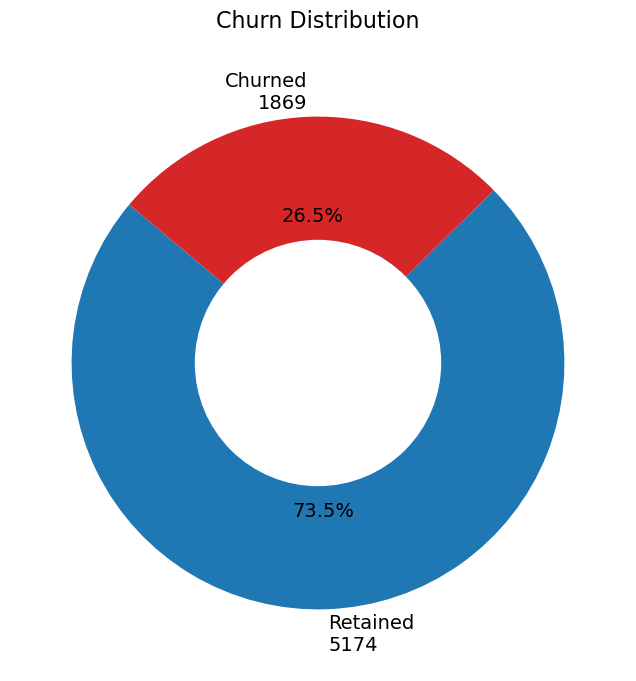

In [22]:
churn_counts = churn['churn'].value_counts()

retained_count = churn_counts[0]  # replace with actual retained count
churned_count = churn_counts[1]   # replace with actual churned count

labels = [f'Retained\n{retained_count}', f'Churned\n{churned_count}']
colors = ["#1f77b4", "#d62728"]

plt.figure(figsize=(8, 8))  
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})

donut_size = 0.5

plt.gca().add_artist(plt.Circle((0,0), donut_size, fc='white'))

plt.title('Churn Distribution', fontsize=16, pad=20)
plt.show()

## Chrun and Demographic Dimension

#### Churn and Senior Citizen

In [23]:
churned_by_senior = churn.groupby('seniorcitizen').churn.mean()
churned_by_senior

seniorcitizen
0    0.236062
1    0.416813
Name: churn, dtype: float64

Those that are seniors have double the change of churning than those who are not at 41%

Graph Churn and Senior Citizen

<Figure size 700x500 with 0 Axes>

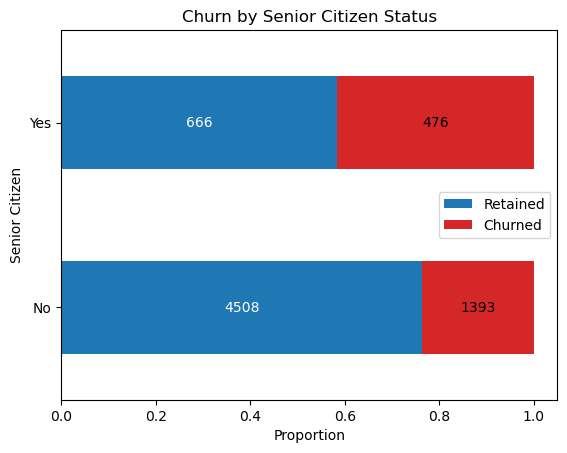

In [24]:
plt.figure(figsize=(7, 5))  

churn_normalized = churn.groupby('seniorcitizen')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='barh', stacked=True, color=['#1f77b4', '#d62728'])

plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(labels=['Retained', 'Churned'])
plt.title('Churn by Senior Citizen Status')
plt.ylabel('Senior Citizen')
plt.xlabel('Proportion')

churn_counts = churn.groupby('seniorcitizen')['churn'].value_counts().unstack()

for n in range(len(churn_normalized)):
    left_segment_width = churn_normalized.iloc[n, 0]
    for i, (status, proportion) in enumerate(churn_normalized.iloc[n].items()):
        count = churn_counts.iloc[n, i]
        if i == 0:
            width = left_segment_width / 2
        else:
            width = left_segment_width + (1 - left_segment_width) / 2

        text_color = 'white' if i == 0 else 'black'
        ha_align = 'center'
        plt.text(width, n, f'{int(count)}', va='center', ha=ha_align, color=text_color)

plt.show() #indeed there seems to be slight more churn by senior citizens, however the statistics tell us there may be something more affecting churn

## Churn and Gender

In [25]:
churned_by_gender = churn.groupby('gender').churn.mean()
churned_by_gender

gender
0    0.269209
1    0.261603
Name: churn, dtype: float64

Not significant difference in churn rate by gender

Graph Churn and Gender

<Figure size 700x500 with 0 Axes>

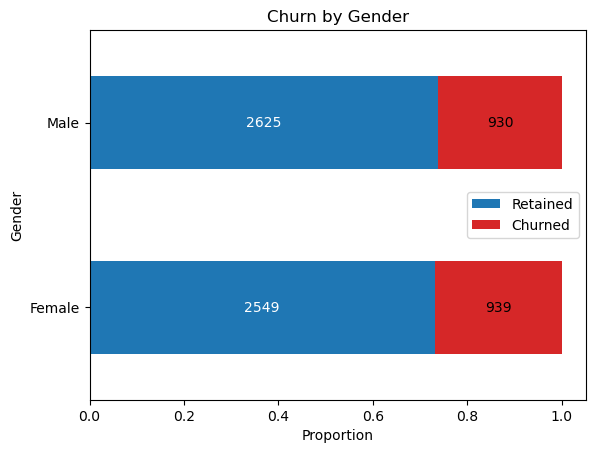

In [26]:
plt.figure(figsize=(7, 5))  

churn_normalized = churn.groupby('gender')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='barh', stacked=True, color=['#1f77b4', '#d62728'])

plt.yticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(labels=['Retained', 'Churned'])
plt.title('Churn by Gender')
plt.ylabel('Gender')
plt.xlabel('Proportion')  

churn_counts = churn.groupby('gender')['churn'].value_counts().unstack()

for n in range(len(churn_normalized)):  
    left_segment_width = churn_normalized.iloc[n, 0]
    for i, (status, proportion) in enumerate(churn_normalized.iloc[n].items()):
        count = churn_counts.iloc[n, i]
        if i == 0:  
            width = left_segment_width / 2  
        else:  
            width = left_segment_width + (1 - left_segment_width) / 2
        text_color = 'white' if i == 0 else 'black'
        plt.text(width, n, f'{int(count)}', va='center', ha='center', color=text_color)

plt.show() #we see no difference

## Churn and Partners Dependents

In [27]:
churned_by_pardep = churn.groupby('partnerdependents').churn.mean()
churned_by_pardep

partnerdependents
0    0.342378
1    0.213296
2    0.254083
3    0.142367
Name: churn, dtype: float64

Single folks with no depedents have the most amount of churn, and those that have both have the least

Graph Churn and PartnersDependents

<Figure size 1000x700 with 0 Axes>

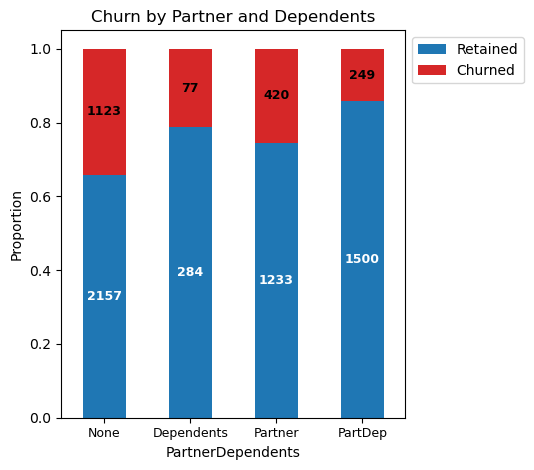

In [28]:
plt.figure(figsize=(10, 7))

churn_normalized = churn.groupby('partnerdependents')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])

plt.xticks(ticks=[0, 1, 2, 3], labels=['None', 'Dependents', 'Partner', 'PartDep'], rotation=0, fontsize=9)
plt.legend(labels=['Retained', 'Churned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Churn by Partner and Dependents')
plt.xlabel('PartnerDependents')
plt.ylabel('Proportion')

churn_counts = churn.groupby('partnerdependents')['churn'].value_counts().unstack()

for n in range(len(churn_normalized)):
    for i in range(len(churn_normalized.columns)):
        count = churn_counts.iloc[n, i]
        proportion = churn_normalized.iloc[n, i]
        height = proportion / 2 if i == 0 else churn_normalized.iloc[n, 0] + proportion / 2
        text_color = 'white' if proportion > 0.5 else 'black'
        plt.text(n, height, str(int(count)), ha='center', va='center', color=text_color, fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

##### Calculate coorelation between all demographic categories and churn with Logisitic Regression Model (multivariate)

In [29]:
import statsmodels.api as sm #import additional libary for model

demographic = (['gender', 'seniorcitizen', 'partnerdependents'])

X = churn[demographic]  # Independent variables
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = churn['churn'] #dependent variable
model = sm.Logit(y, X).fit()
model.summary() 

Optimization terminated successfully.
         Current function value: 0.553002
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                 0.04424
Time:                        18:09:24   Log-Likelihood:                -3894.8
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                 7.732e-78
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7833      0.048    -16.437      0.000      -0.877      -0.690
gender               -0.0322      0.055     -0.581      0.561      -0.141       0.076
seniorcitizen         0.8037      0.068     11.746      0.000       0.670       0.938
partnerdependents    -0.3243      0.023    -14.155      0.000      -0.369      -0.279
=====================================================================================
"""

Being a senior citizen seems to increase the likelihood of churn at a coef of 0.8037, while having partner dependents seems to slightly decrease it (coef -0.3243). Gender doesn't seem to play a significant role (coef -0.0322).

Plotting the Regression Model (we can see the relationship to the zero; a impact on churn)

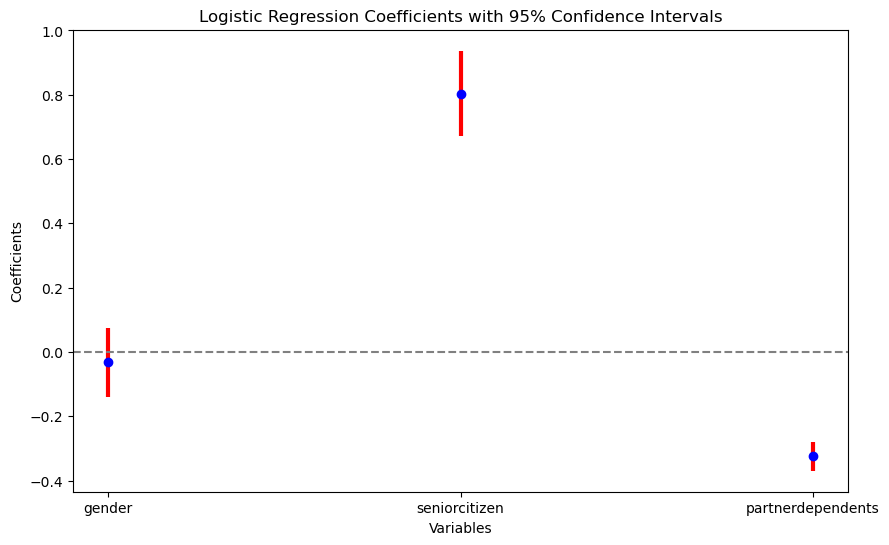

In [30]:
coefficients = [-0.0322, 0.8037, -0.3243]
errors = [0.055, 0.068, 0.023]
variables = ['gender', 'seniorcitizen', 'partnerdependents']

# Calculate the confidence intervals (using z-score for 95% confidence)
# For logistic regression, the 95% CI is approximated as coef +/- 1.96 * standard error
conf_intervals = [(coef - 1.96 * err, coef + 1.96 * err) for coef, err in zip(coefficients, errors)]

# Split the lower and upper values for error bars
lower_values = [coef - ci[0] for coef, ci in zip(coefficients, conf_intervals)]
upper_values = [ci[1] - coef for coef, ci in zip(coefficients, conf_intervals)]


plt.figure(figsize=(10, 6))

# Coefficient plot
plt.errorbar(variables, coefficients, yerr=[lower_values, upper_values], fmt='o', color='b', ecolor='r', elinewidth=3, capsize=0)

plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients with 95% Confidence Intervals')
plt.style.use('ggplot')

plt.show()

Demographic summary: Those who are senior citizens are more likely to churn, and those that have partner/dependents are less likely to churn than single people. However, the association of these two demographics categories on their own are not very good predictors of churn as they have weak associations to each other. Gender has no effect on churn

## Churn and Phone Service

In [31]:
churned_by_pservice = churn.groupby('phoneservice').churn.mean()
churned_by_pservice

phoneservice
0    0.249267
1    0.250442
2    0.286099
Name: churn, dtype: float64

It seems that all of our phone services have about the same amount of churn, with a slight increase to multiple lines. That could be affected by the cost of multiplelines

Graph Churn and Phone Service

<Figure size 1000x700 with 0 Axes>

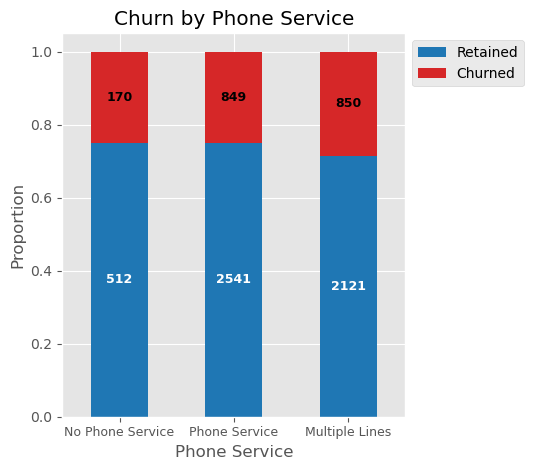

In [32]:
plt.figure(figsize=(10, 7))

churn_normalized = churn.groupby('phoneservice')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])

plt.xticks(ticks=[0, 1, 2], labels=['No Phone Service', 'Phone Service', 'Multiple Lines'], rotation=0, fontsize=9)
plt.legend(labels=['Retained', 'Churned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Proportion')

churn_counts = churn.groupby('phoneservice')['churn'].value_counts().unstack()

for n in range(len(churn_normalized)):
    for i in range(len(churn_normalized.columns)):
        count = churn_counts.iloc[n, i]
        proportion = churn_normalized.iloc[n, i]
        height = proportion / 2 if i == 0 else churn_normalized.iloc[n, 0] + proportion / 2
        text_color = 'white' if proportion > 0.5 else 'black'
        plt.text(n, height, str(int(count)), ha='center', va='center', color=text_color, fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show() #interesting! a little bit more churn when having multiple lines

#### Churn and Internet Service

In [33]:
churned_by_iservice = churn.groupby('internetservice').churn.mean()
churned_by_iservice

internetservice
0    0.074050
1    0.189591
2    0.418928
Name: churn, dtype: float64

Fiber optic is causing the most churn at a rate of 41%. However, this could be caused by the price of fiber optic vs DSL

Graph Churn and Internet Service

<Figure size 1000x700 with 0 Axes>

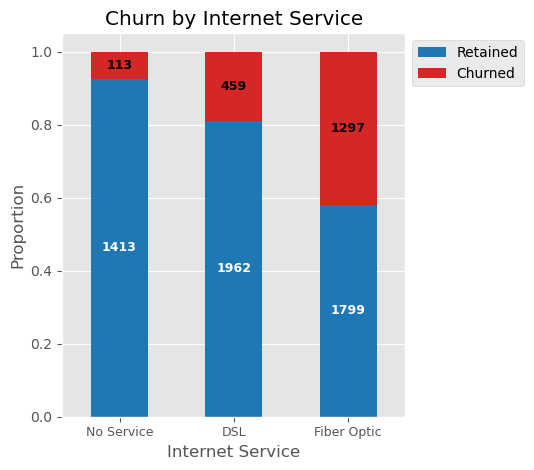

In [34]:
plt.figure(figsize=(10, 7))

churn_normalized = churn.groupby('internetservice')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])

plt.xticks(ticks=[0, 1, 2], labels=['No Service', 'DSL', 'Fiber Optic'], rotation=0, fontsize=9)
plt.legend(labels=['Retained', 'Churned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Proportion')

churn_counts = churn.groupby('internetservice')['churn'].value_counts().unstack()

for n in range(len(churn_normalized)):
    for i in range(len(churn_normalized.columns)):
        count = churn_counts.iloc[n, i]
        proportion = churn_normalized.iloc[n, i]
        height = proportion / 2 if i == 0 else churn_normalized.iloc[n, 0] + proportion / 2
        text_color = 'white' if proportion > 0.5 else 'black'
        plt.text(n, height, str(int(count)), ha='center', va='center', color=text_color, fontsize=9, fontweight='bold')


plt.tight_layout(rect=[0, 0, 0.85, 1])


plt.show() #it seems Fiber Optic is causing the most churn

#### What online service is the most popular?

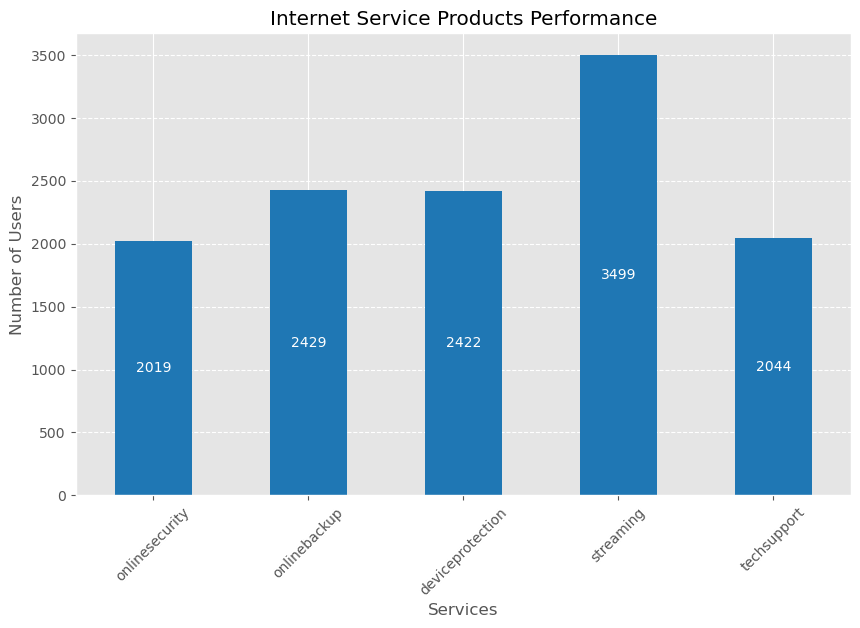

In [35]:
columns_of_interest = ['onlinesecurity', 'onlinebackup', 'deviceprotection' , 'streaming', 'techsupport']

# Map all non-zero values in 'Streaming' to 1
streaming_mapped = churn['streaming'].apply(lambda x: 1 if x > 0 else 0)

# 'streaming_mapped' as a separate Series that we can use without altering 'churn'
service_counts = churn[columns_of_interest].copy()  
service_counts['streaming'] = streaming_mapped  

service_counts_churn = service_counts.sum()

plt.figure(figsize=(10, 6))
barplot = service_counts_churn.plot(kind='bar', color='#1f77b4')
plt.title('Internet Service Products Performance')
plt.xlabel('Services')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

for idx, value in enumerate(service_counts_churn):
    plt.text(idx, value / 2, str(value), ha='center', va='center', color='white')

plt.show() #Streaming service is the most popular. Let's dive deeper...

In [36]:
columns_of_interest = ['onlinesecurity', 'onlinebackup', 'deviceprotection' , 'streaming', 'techsupport']

churn[churn['churn'] == 1][columns_of_interest].sum()

onlinesecurity       295
onlinebackup         523
deviceprotection     545
streaming           2446
techsupport          310
dtype: int64

Streaming is causing a disportionate amount of churn compared to the rest of the internet service. We will continue to take a deeper look. Note, outside streaming, Online Security is our best performing product with the least amount of churn and then after that would be techsupport

### Graphing Internet Products and Churn

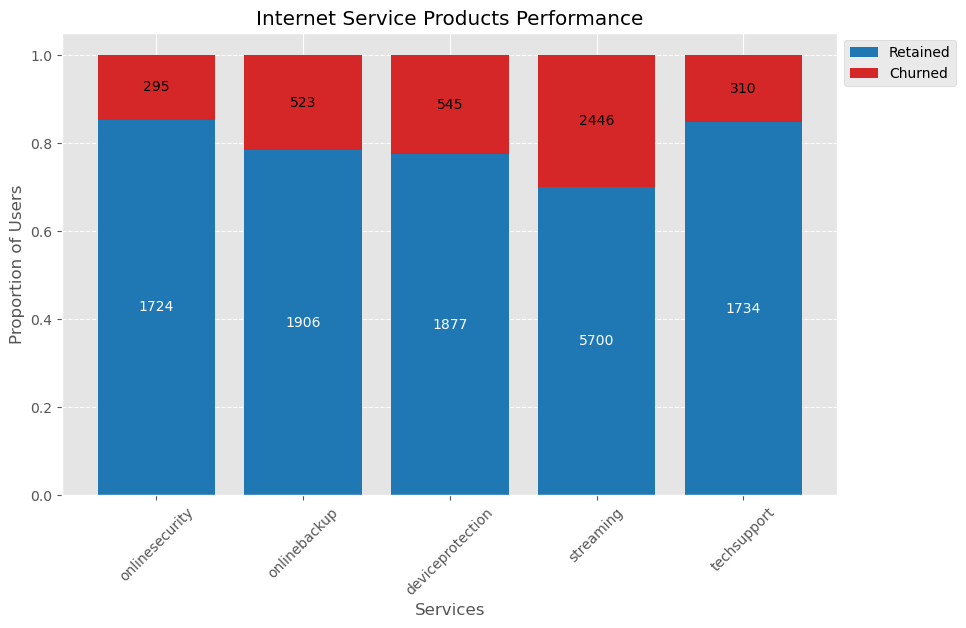

In [37]:
columns_of_interest = ['onlinesecurity', 'onlinebackup', 'deviceprotection' , 'streaming', 'techsupport']

service_counts_churned = churn[churn['churn'] == 1][columns_of_interest].sum()
service_counts_retained = churn[churn['churn'] == 0][columns_of_interest].sum()

total_counts = service_counts_churned + service_counts_retained
proportion_churned = service_counts_churned / total_counts
proportion_retained = service_counts_retained / total_counts

plt.figure(figsize=(10, 6))

bars_retained = plt.bar(proportion_retained.index, proportion_retained.values, color='#1f77b4', label='Retained')
bars_churned = plt.bar(proportion_churned.index, proportion_churned.values, bottom=proportion_retained.values, color='#d62728', label='Churned')

plt.title('Internet Service Products Performance')
plt.xlabel('Services')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

for idx, service in enumerate(columns_of_interest):
    churn_count = service_counts_churned[service]
    retained_count = service_counts_retained[service]

    if proportion_churned[service] < 0.1:
        y_churn = proportion_retained[service] + proportion_churned[service] + 0.03
    else:
        y_churn = proportion_retained[service] + proportion_churned[service] / 2

    if proportion_retained[service] < 0.1:
        y_retain = proportion_retained[service] + 0.03
    else:
        y_retain = proportion_retained[service] / 2

    plt.text(idx, y_churn, int(churn_count), ha='center', va='center', color='black', fontsize=8 if proportion_churned[service] < 0.1 else 10)
    plt.text(idx, y_retain, int(retained_count), ha='center', va='center', color='white', fontsize=8 if proportion_retained[service] < 0.1 else 10)

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show() #streaming though our most popular service, it causing the most churn out of the internet service products...maybe we have bad movies and tv shows?


## Diving into the stream

In [38]:
churned_by_stream = churn.groupby('streaming').churn.mean()
churned_by_stream

streaming
0    0.227991
1    0.311869
2    0.316819
3    0.294330
Name: churn, dtype: float64

All streaming services seem to be performing no better than the other. However, there is slighly more churn if they have tv or movies by themselves, instead of the full package

Graph Streaming Services

<Figure size 1000x700 with 0 Axes>

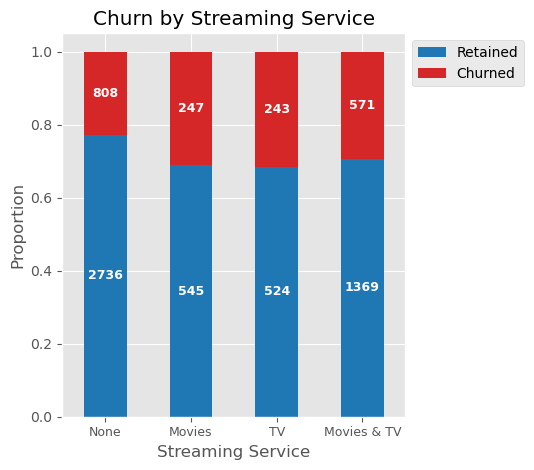

In [39]:
plt.figure(figsize=(10, 7))

churn_normalized = churn.groupby('streaming')['churn'].value_counts(normalize=True).unstack()


churn_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])

plt.xticks(ticks=[0, 1, 2, 3], labels=['None', 'Movies', 'TV', 'Movies & TV'], rotation=0, fontsize=9)
plt.legend(labels=['Retained', 'Churned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Churn by Streaming Service')
plt.xlabel('Streaming Service')
plt.ylabel('Proportion')


churn_counts = churn.groupby('streaming')['churn'].value_counts().unstack()

for i in range(len(churn_normalized.index)):
    proportion_retained = churn_normalized.iloc[i, 0]
    count_retained = churn_counts.iloc[i, 0]
    plt.text(i, proportion_retained / 2, str(count_retained), ha='center', va='center', color='white', fontsize=9, fontweight='bold')

    
    if churn_normalized.shape[1] > 1 and not pd.isnull(churn_normalized.iloc[i, 1]):
        proportion_churned = churn_normalized.iloc[i, 1]
        count_churned = churn_counts.iloc[i, 1]
        plt.text(i, proportion_retained + (proportion_churned * 0.5), str(count_churned), ha='center', va='center', color='white', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show() #it would seem there is no difference in the type of streaming service is prefable

#### Applying Logisitic Regression Model across all products 

In [40]:
products = (['phoneservice', 'internetservice', 'onlinebackup', 'onlinesecurity', 'deviceprotection', 'techsupport' , 'streaming'])


products = ['phoneservice', 'internetservice', 'onlinebackup', 'onlinesecurity', 'deviceprotection', 'techsupport', 'streaming']
X = churn[products].copy()
X['streaming'] = (X['streaming'] > 0).astype(int) #because steaming is not binary
X = sm.add_constant(X)
y = churn['churn']
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.474568
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7035
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.1798
Time:                        18:09:25   Log-Likelihood:                -3342.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8187      0.083    -21.995      0.000      -1.981      -1.657
phoneservice        -0.3314      0.051     -6.478      0.000      -0.432      -0.231
internetservice      1.4323      0.052     27.549      0.000       1.330       1.534
onlinebackup        -0.5631      0.069     -8.187      0.000      -0.698      -0.428
onlinesecurity      -0.8752      0.077    -11.405      0.000      -1.026      -0.725
deviceprotection    -0.4489      0.071     -6.364      0.000      -0.587      -0.311
techsupport         -0.7866      0.077    -10.179      0.000      -0.938      -0.635
streaming            0.0680      0.072      0.950      0.342      -0.072       0.208
====================================================================================
"""

What does this data tell us? 
 -   Phone Service: People are a bit less likely to churn.
 -   Internet Service: People are more likely to churn. However, internet services have a number of products associated with it and can not be taken at face value
 -   Online Backup: People are a bit less likely to churn.
 -   Online Security: People are significantly less likely to churn.
 -   Device Protection: People are a bit less likely to churn.
 -   Tech Support: People are a bit less likely to churn.
 -   Streaming: People are slightly more likely to churn


 Let's show it on a different graph from above

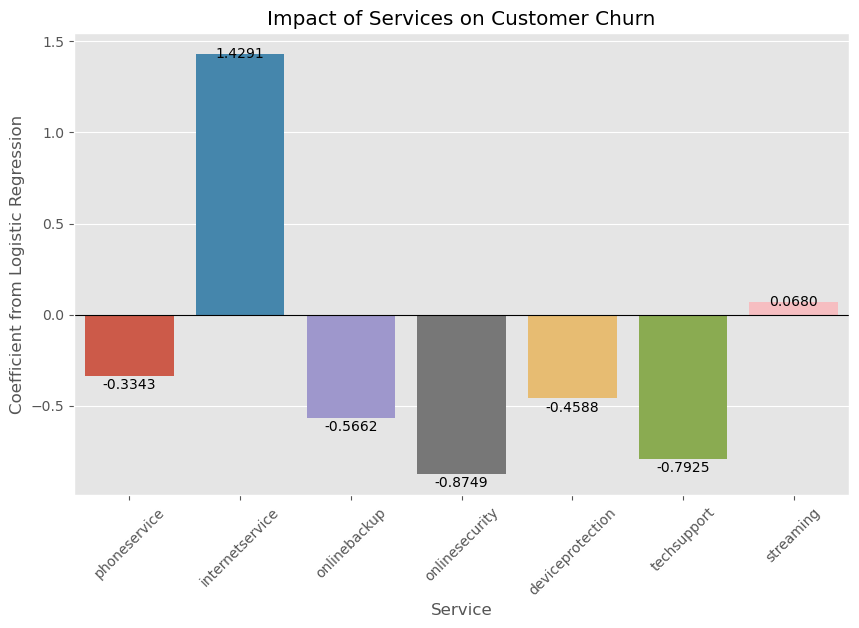

In [41]:
service_coefficients = {
    'phoneservice': -0.3343,
    'internetservice': 1.4291,
    'onlinebackup': -0.5662,
    'onlinesecurity': -0.8749,
    'deviceprotection': -0.4588,
    'techsupport': -0.7925,
    'streaming': 0.0680
}
coeff_df1 = pd.DataFrame(list(service_coefficients.items()), columns=['Service', 'Coefficient'])

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Service', y='Coefficient', data=coeff_df1)

# Title and labels
plt.title('Impact of Services on Customer Churn')
plt.ylabel('Coefficient from Logistic Regression')
plt.xlabel('Service')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)

for p in ax.patches:
    # Determine the label position
    label_position = p.get_height() if p.get_height() > 0 else p.get_height() - 0.05
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., label_position),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 0),
                textcoords='offset points')

plt.show() #having onlinesecurity and techsupport will help decrease churn.  

## Churn and Seniority

Churn and Tenure

In [42]:
churn[churn['churn'] == 1]['tenure'].mean()

17.979133226324237

In [43]:
churn[churn['churn'] == 0]['tenure'].mean()

37.56996521066873

Average tenure of churned customers is 17 years, and average tenure of retained customers is 37 years 

#### Graph tenure and churn

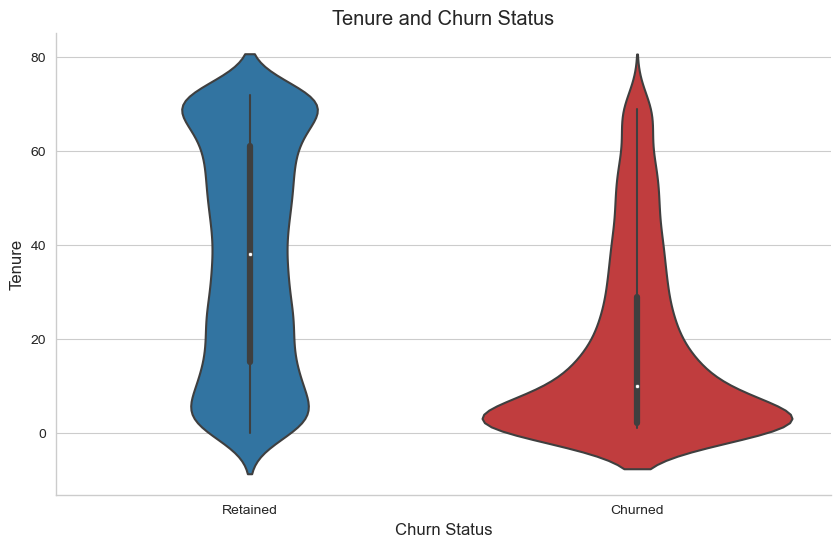

In [44]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(x='churn', y='tenure', data=churn, palette={0: "#1f77b4", 1: "#d62728"}) 
plt.title('Tenure and Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.xticks([0, 1], ['Retained', 'Churned'])
sns.despine()

plt.show() #we see those that have the least amount of tenure are churning more

## Churn and Contract Type

In [45]:
churned_by_contracttype = churn.groupby('contracttype').churn.mean()
churned_by_contracttype

contracttype
1    0.112695
2    0.028319
3    0.427097
Name: churn, dtype: float64

One year, and especially two year contracts have very low churn rates. While Month-to-Month have a 42% churn rate

Graph Contract Type and Churn

<Figure size 1000x700 with 0 Axes>

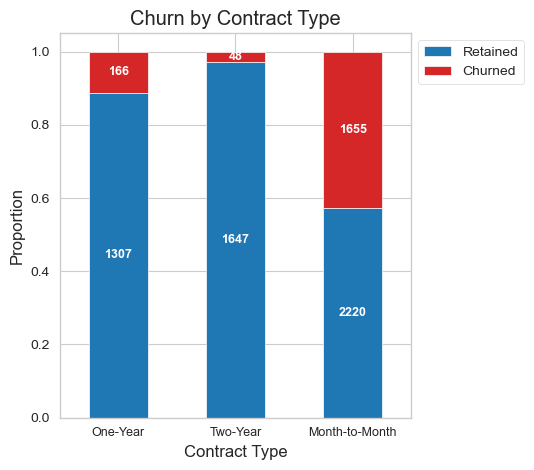

In [46]:
plt.figure(figsize=(10, 7))

churn_normalized = churn.groupby('contracttype')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])

plt.xticks(ticks=[0, 1, 2], labels=['One-Year', 'Two-Year', 'Month-to-Month'], rotation=0, fontsize=9)
plt.legend(labels=['Retained', 'Churned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Proportion')

churn_counts = churn.groupby('contracttype')['churn'].value_counts().unstack()

for i in range(len(churn_normalized.index)):
    if not pd.isnull(churn_normalized.iloc[i, 0]):
        proportion_retained = churn_normalized.iloc[i, 0]
        count_retained = churn_counts.iloc[i, 0]
        plt.text(i, proportion_retained / 2, str(count_retained), ha='center', va='center', color='white', fontsize=9, fontweight='bold')

    if churn_normalized.shape[1] > 1 and not pd.isnull(churn_normalized.iloc[i, 1]):
        proportion_churned = churn_normalized.iloc[i, 1]
        count_churned = churn_counts.iloc[i, 1]
        plt.text(i, proportion_retained + (proportion_churned / 2), str(count_churned), ha='center', va='center', color='white', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show() 

#### Applying Logisitic Regression Model across Seniority dimension

In [47]:
seniority = (['tenure','contracttype'])

X = churn[seniority]  
X = sm.add_constant(X)  
y = churn['churn'] 
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.488734
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.1553
Time:                        18:09:26   Log-Likelihood:                -3442.2
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                1.336e-275
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.4876      0.167    -14.857      0.000      -2.816      -2.159
tenure          -0.0257      0.002    -16.287      0.000      -0.029      -0.023
contracttype     0.8546      0.054     15.768      0.000       0.748       0.961
================================================================================
"""

What does the data say? 

- "const"  coef is -2.48. If we knew nothing else, Since it's negative, it suggests they're more likely to be retained based upon seniority.
- "tenure"  coef is -0.0257 The negative number tells us that the longer they've been with the organization, the less likely they are to churn.
- "contracttype" coef is  0.8546, the positive number means the type of contract they have makes them more likely to churn


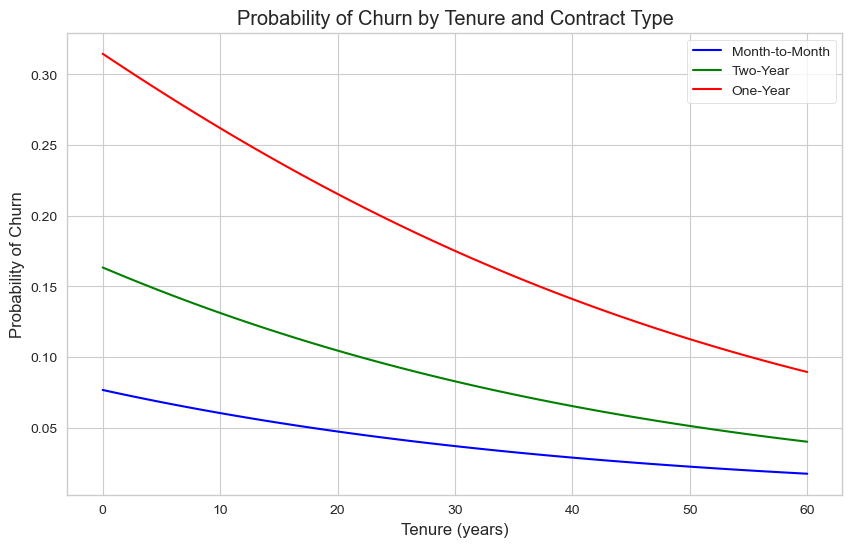

In [48]:
intercept = -2.4876
tenure_coef = -0.0257
contracttype_coef = 0.8546
tenure = np.linspace(0, 60, 100)  # Let's say tenure goes from 0 to 60 years
contracttypes = {'Month-to-Month': 1, 'Two-Year': 2, 'One-Year': 3}
colors = {'Month-to-Month': 'blue', 'Two-Year': 'green', 'One-Year': 'red'}

plt.figure(figsize=(10, 6))

for contract, value in contracttypes.items():
    churn_probability = 1 / (1 + np.exp(-(intercept + tenure_coef * tenure + contracttype_coef * (value-1))))
    plt.plot(tenure, churn_probability, label=f'{contract}', color=colors[contract])

plt.title('Probability of Churn by Tenure and Contract Type')
plt.xlabel('Tenure (years)')
plt.ylabel('Probability of Churn')
plt.legend()
plt.grid(True)
plt.show() #the Month-to-Month contract has the highest probability of churn, while the One-Year and Two-Year contracts have progressively lower probabilities as tenure increases.

## Churn and Expenditure

Churn and Monthly Charges

In [49]:
churn[churn['churn'] == 1][['monthlycharges']].mean() 

monthlycharges    74.441332
dtype: float64

In [50]:
churn[churn['churn'] == 0][['monthlycharges']].mean() 

monthlycharges    61.265124
dtype: float64

Those that spend $74 monthly are the most likely to churn and those that spend $61 monthly are more likely to retain

Graphing Churn and Monthly Charges

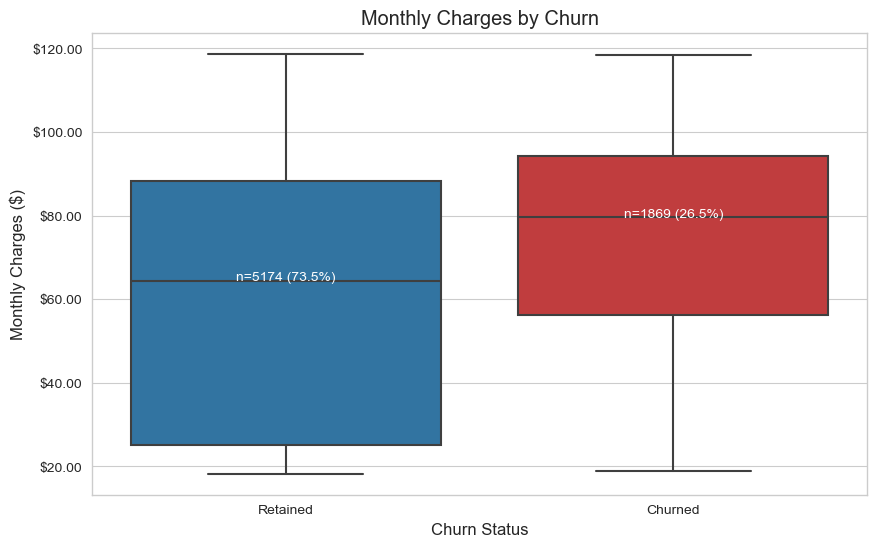

In [51]:
from matplotlib.ticker import FuncFormatter

def dollar_formatter(x, pos):
    return '${:.2f}'.format(x)

sns.set_style("whitegrid")

palette = {0: "#1f77b4", 1: "#d62728"}  

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='churn', y='monthlycharges', data=churn, palette=palette)
ax.set_title('Monthly Charges by Churn')
ax.set_xlabel('Churn Status')
ax.set_ylabel('Monthly Charges ($)')
ax.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
ax.set_xticklabels(['Retained', 'Churned'])

counts = churn['churn'].value_counts().sort_index()
total = len(churn)

for i, count in enumerate(counts):
    percentage = (count / total) * 100
    y_median = churn[churn['churn'] == i]['monthlycharges'].median()
    ax.text(i, y_median, 'n={} ({:.1f}%)'.format(count, percentage), ha='center', color='white')

plt.show()

Churn and Total Charges

In [52]:
churn[churn['churn'] == 1][['totalcharges']].mean() #would suggest $1531 is the mean of charges for the most churned

totalcharges    1531.796094
dtype: float64

In [53]:
churn[churn['churn'] == 0][['totalcharges']].mean() #would suggest that those $2555 are more likely to retain..however, this can be skewed by their tenue...let's continue...

totalcharges    2555.061142
dtype: float64

Graphing Total Charges

c:\Users\yosef\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yosef\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


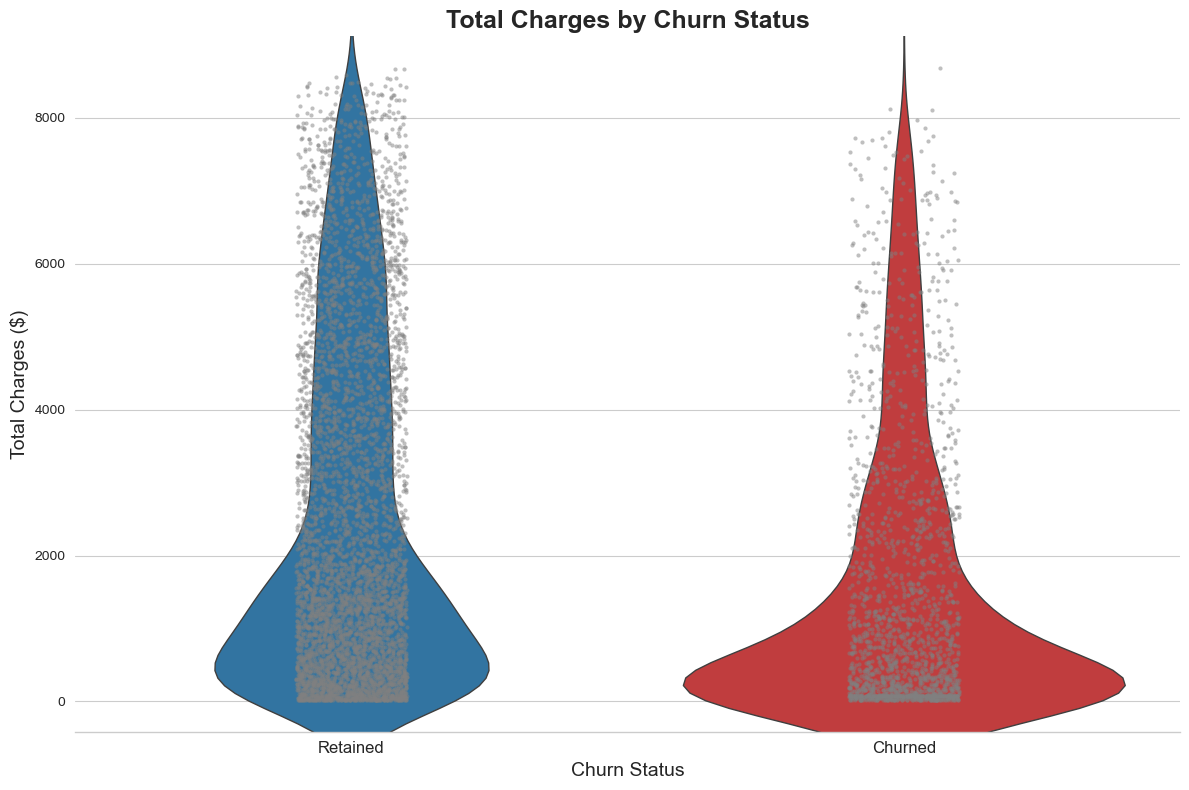

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

palette = ["#1f77b4", "#d62728"]
ax = sns.violinplot(x='churn', y='totalcharges', data=churn, palette=palette, inner=None, linewidth=1, alpha=0.7)

sns.stripplot(x='churn', y='totalcharges', data=churn, color='grey', size=3, jitter=True, alpha=0.5) #We have a wide distrubtion of values, this helps us visualize it better
ax.set_title('Total Charges by Churn Status', fontsize=18, weight='bold')
ax.set_xlabel('Churn Status', fontsize=14)
ax.set_ylabel('Total Charges ($)', fontsize=14)
ax.set_xticklabels(['Retained', 'Churned'], fontsize=12)
sns.despine(left=True, top=True)

plt.tight_layout()
plt.show() #we can see those with larger total charges have higher churn rates...or is it being skewed because naturally tenured customer will accur more total charges? Let's continue...

We can find the mean tenure and total charges of those that churn the most

In [55]:
churn[churn['churn'] == 1][['tenure', 'totalcharges']].mean() #Indeed, those that have been with the company 17 years, and have total charges aroun 1531 will churn most

tenure            17.979133
totalcharges    1531.796094
dtype: float64

In [56]:
churn[churn['churn'] == 0][['tenure', 'totalcharges']].mean() #indeed, those who are with the organization for 37 years and spend 2555 are most likely retained

tenure            37.569965
totalcharges    2555.061142
dtype: float64

We can plot that relationship of tenure and total charges to tenure

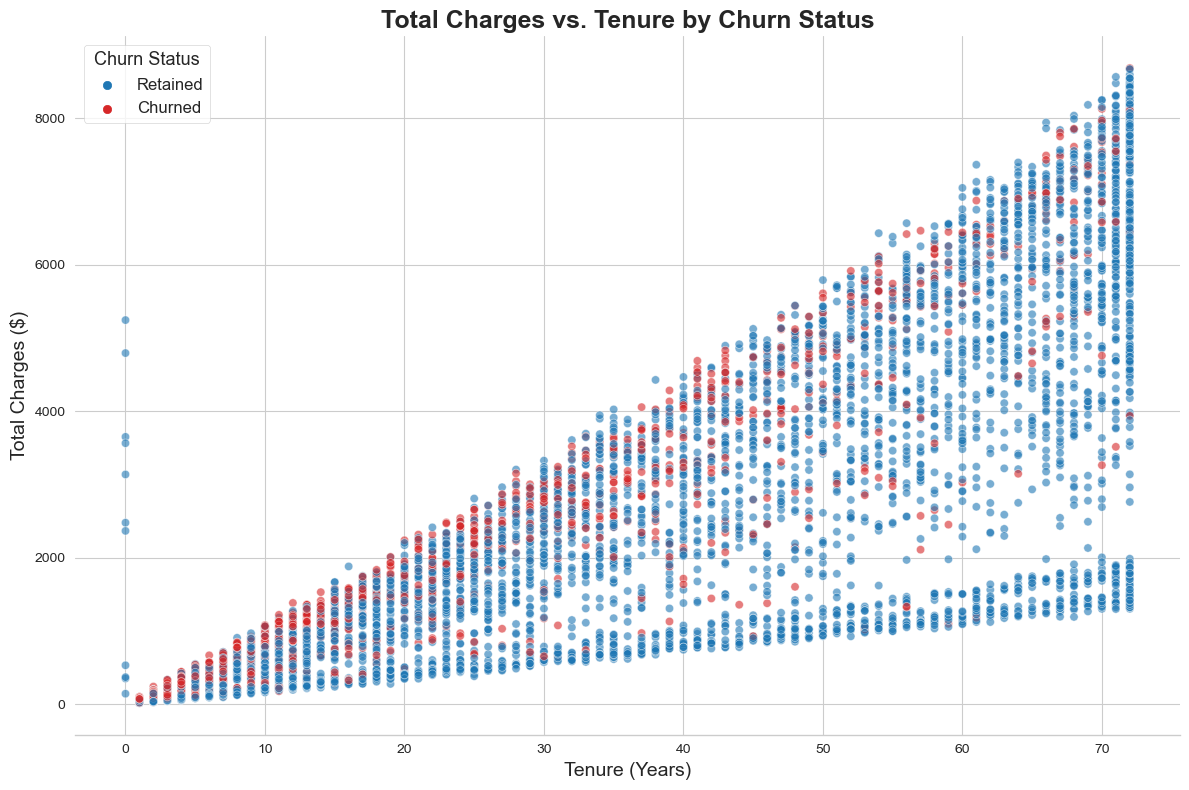

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#d62728"}

sns.scatterplot(x='tenure', y='totalcharges', hue='churn', data=churn, palette=palette, alpha=0.6)
plt.title('Total Charges vs. Tenure by Churn Status', fontsize=18, weight='bold')
plt.xlabel('Tenure (Years)', fontsize=14)
plt.ylabel('Total Charges ($)', fontsize=14)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Retained', 'Churned']
plt.legend(handles=handles, labels=new_labels, title='Churn Status', title_fontsize='13', fontsize='12')
sns.despine(left=True, top=True)

plt.tight_layout()
plt.show() #indeed we see that most that are with us do stay with us, and the distribution of the number skews the true churn in total charges

## Churn and Payment Methods

In [58]:
churned_by_paymentmethods_rates = churn.groupby('paymentmethods').churn.mean()
churned_by_paymentmethods_rates

paymentmethods
1    0.167098
2    0.152431
3    0.452854
4    0.191067
Name: churn, dtype: float64

Every Payment method is around 15-20% churn rate, while E-Check is at 45%

Graphing Payment Methods

<Figure size 1000x700 with 0 Axes>

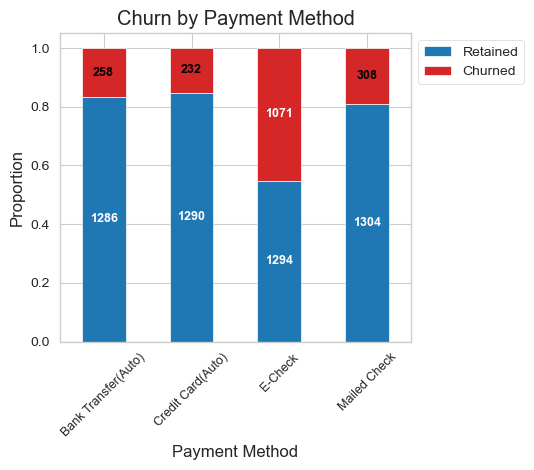

In [59]:
plt.figure(figsize=(10, 7))

churn_normalized = churn.groupby('paymentmethods')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])

plt.xticks(ticks=range(len(churn_normalized)), labels=['Bank Transfer(Auto)', 'Credit Card(Auto)', 'E-Check', 'Mailed Check'], rotation=45, fontsize=9)  
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Proportion')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Retained', 'Churned'], title='', loc='upper left', bbox_to_anchor=(1, 1))

churn_counts = churn.groupby('paymentmethods')['churn'].value_counts().unstack()

for n, (index, row) in enumerate(churn_normalized.iterrows()):
    for i, value in enumerate(row):
        count = churn_counts.iloc[n, i]
        proportion = value
        height = proportion / 2 if i == 0 else row[:i].sum() + proportion / 2
        text_color = 'white' if proportion > 0.2 else 'black'  
        plt.text(n, height, str(int(count)), ha='center', va='center', color=text_color, fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show() #it would seem E-check is causing the most churn out of all the payment method choice

## Churn and Paperless Billing

In [60]:
churned_by_billtype = churn.groupby('paperlessbilling').churn.mean()
churned_by_billtype

paperlessbilling
0    0.163301
1    0.335651
Name: churn, dtype: float64

It would seem those that have E-billing are more likely to churn

Graphing Churn and Paperless Billing

<Figure size 1000x700 with 0 Axes>

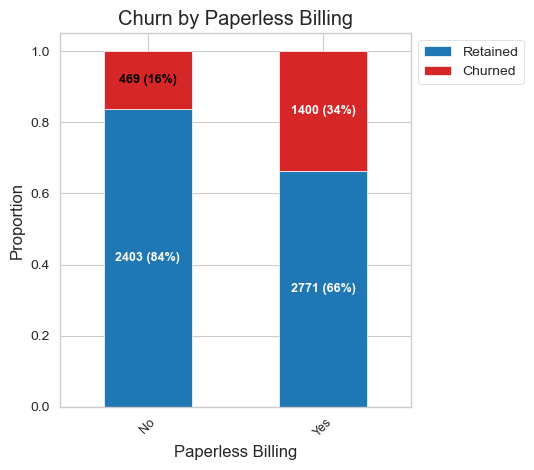

In [61]:
plt.figure(figsize=(10, 7))

churn_normalized = churn.groupby('paperlessbilling')['churn'].value_counts(normalize=True).unstack()
churn_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])

plt.xticks(ticks=range(len(churn_normalized)), labels=['No', 'Yes'], rotation=45, fontsize=9)  
plt.title('Churn by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Proportion')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Retained', 'Churned'], title='', loc='upper left', bbox_to_anchor=(1, 1))

churn_counts = churn.groupby('paperlessbilling')['churn'].value_counts().unstack()

for n, (index, row) in enumerate(churn_normalized.iterrows()):
    for i, value in enumerate(row):
        count = churn_counts.iloc[n, i]
        proportion = value
        height = proportion / 2 if i == 0 else row[:i].sum() + proportion / 2
        text_color = 'white' if proportion > 0.2 else 'black'
        plt.text(n, height, f'{int(count)} ({proportion:.0%})', ha='center', va='center', color=text_color, fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

#### Applying Logisitic Regression Model across Expenditure dimension

In [62]:
expenditure = (['monthlycharges','totalcharges', 'paymentmethods', 'paperlessbilling'])

X = churn[expenditure]  
X = sm.add_constant(X)  
y = churn['churn'] 
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.459839
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7038
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.2053
Time:                        18:09:27   Log-Likelihood:                -3238.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3678      0.138    -24.455      0.000      -3.638      -3.098
monthlycharges       0.0419      0.001     28.246      0.000       0.039       0.045
totalcharges        -0.0006   2.02e-05    -29.231      0.000      -0.001      -0.001
paymentmethods       0.1295      0.032      4.015      0.000       0.066       0.193
paperlessbilling     0.6065      0.069      8.767      0.000       0.471       0.742
====================================================================================
"""

What does our data say? 
- monthlycharges: Since this coefficient is positive and the p-value is small this would indicate that higher monthly charges are associated with a higher likelihood of churning.

- totalcharges: This has a negative coefficient, which might suggest that customers with higher total charges over time are less likely to churn. The p-value is very small, so this relationship is considered statistically significant. However, we saw that the mean value of churn are for customers with 17 years of tenure

- paymentmethods: This also has a positive coefficient with a small p-value, indicating that the method of payment has an effect on churn likelihood. As this variable increases (whichcorresponds to different payment methods), so does the likelihood of churning, as we saw in the graph and mean that E-check has a significant churn rate

- Paperless Billing has high positive coefficent, indicating when a customer has paperless billing, there is a high chance of churn, compared if they did not. 



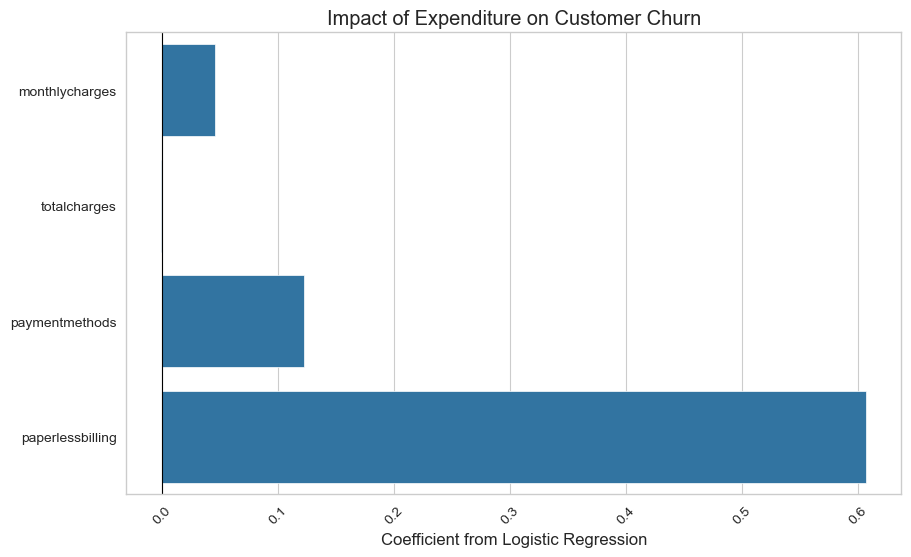

In [63]:
expenditure_coefficients = {
    'monthlycharges': 0.0455,
    'totalcharges': -0.0006,
    'paymentmethods': 0.1224,
    'paperlessbilling': 0.6065,
}

coeff_df2 = pd.DataFrame(list(expenditure_coefficients.items()), columns=['Expenditure', 'Coefficient'])

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 

sns.barplot(x='Coefficient', y='Expenditure', data=coeff_df2, color='#1f77b4')

plt.title('Impact of Expenditure on Customer Churn')
plt.ylabel('') 
plt.xlabel('Coefficient from Logistic Regression')

plt.axvline(0, color='black', linewidth=0.8)

plt.xticks(rotation=45)  
plt.show()